# **Car Dekho Dataset**


In [ ]:
# Dataset link
# https://raw.githubusercontent.com/akmalatnamal/davlab7/main/car_dekho_full.csv


In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/akmalatnamal/davlab7/main/car_dekho_full.csv')

In [ ]:
df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


<Figure size 1080x576 with 0 Axes>

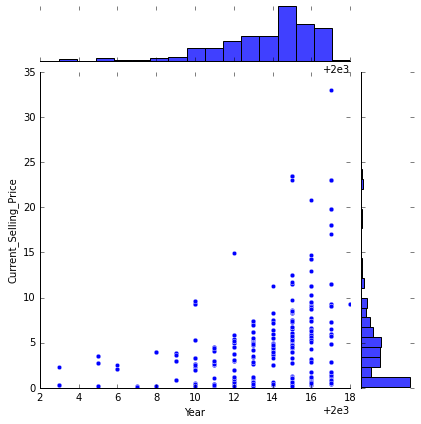

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.jointplot(x = 'Year', y = 'Current_Selling_Price', data = df , kind = 'scatter' )


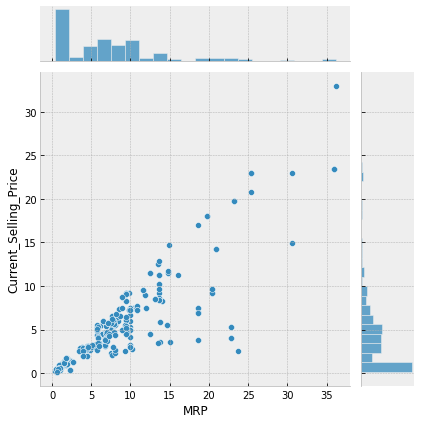

In [ ]:
ax = sns.jointplot(x = 'MRP', y = 'Current_Selling_Price', data = df , kind = 'scatter' )

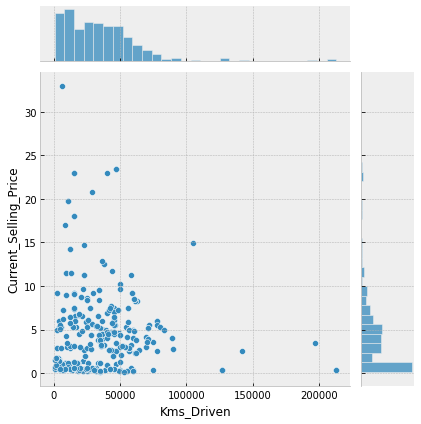

In [ ]:
ax = sns.jointplot(x = 'Kms_Driven', y = 'Current_Selling_Price', data = df , kind = 'scatter' )

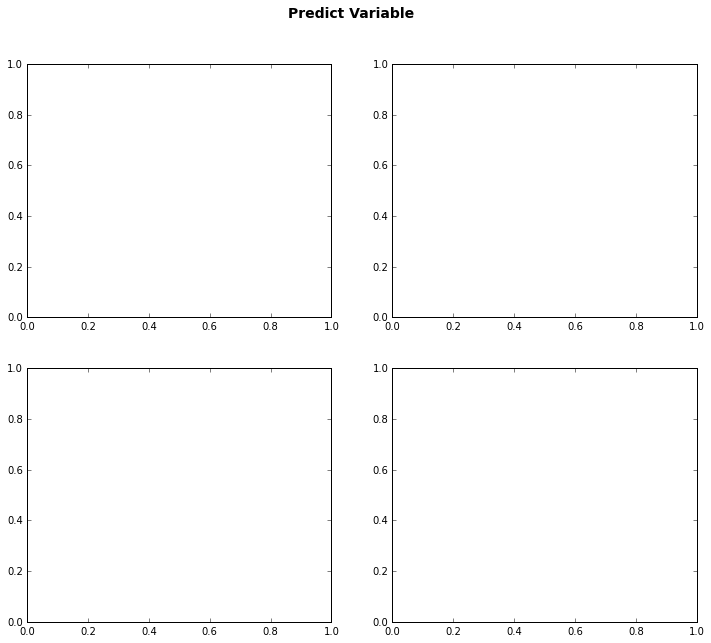

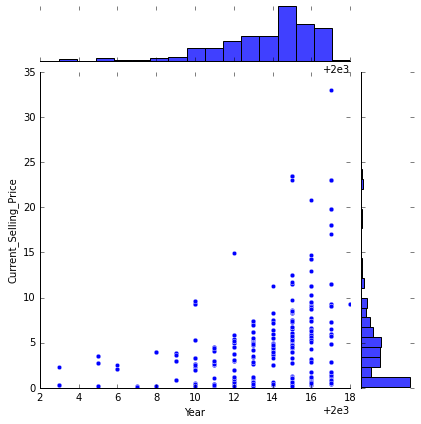

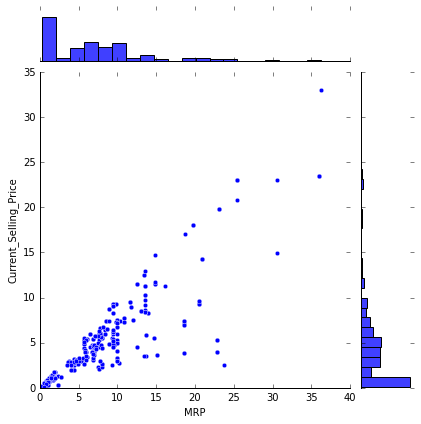

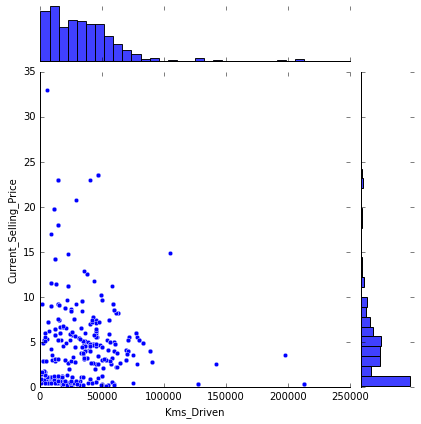

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))
fig.suptitle('Predict Variable',fontsize=14, fontweight="bold")
ax1 = sns.jointplot(x = 'Year', y = 'Current_Selling_Price', data = df , kind = 'scatter' )
ax2 = sns.jointplot(x = 'MRP', y = 'Current_Selling_Price', data = df , kind = 'scatter' )
ax3 = sns.jointplot(x = 'Kms_Driven', y = 'Current_Selling_Price', data = df , kind = 'scatter' )
fig.show()

Estimated coefficients:
a = 0.11451450725897327            
b = 0.6190452506600176


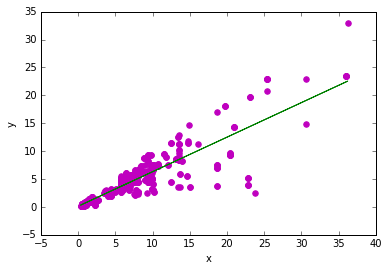

In [ ]:
# Find a and b value of linear regression

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b = SS_xy / SS_xx
    a = m_y - b*m_x
 
    return (a, b)
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = df['MRP']
    y = df['Current_Selling_Price']
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\na = {}  \
          \nb = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split



In [ ]:
lreg = LinearRegression()
x = np.array(df['MRP']).reshape(-1, 1)
y = np.array(df['Current_Selling_Price']).reshape(-1, 1)
lreg.fit(x,y)
print(lreg.intercept_)
print(lreg.coef_)
y_predt = lreg.predict(x)
mse_train = mean_squared_error(y , y_predt)
r2 = r2_score(y , y_predt)

print('MSE for train data is', mse_train)
print('R2 Score for data train', r2)

[0.11451451]
[[0.61904525]]
MSE for train data is 4.315940318497916
R2 Score for data train 0.7882391633331514


MSE for test data is 3.969991477271064
MSE for train data is 4.403545397054986
R2 Score for data test 0.7278980828522112
R2 Score for data train 0.7981276939073616


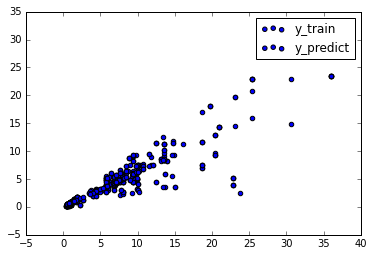

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 41)
lreg = LinearRegression()
lreg.fit(x_train,y_train)

y_predt = lreg.predict(x_test)
y_train_predt = lreg.predict(x_train)

mse_test = mean_squared_error(y_test , y_predt)
mse_train = mean_squared_error(y_train , y_train_predt)
r2_test = r2_score(y_test , y_predt)
r2_train = r2_score(y_train , y_train_predt)

print('MSE for test data is', mse_test)
print('MSE for train data is', mse_train)
print('R2 Score for data test', r2_test)
print('R2 Score for data train', r2_train)

plt.scatter(x_train,y_train,label = 'y_train')
plt.scatter(x_test, y_predt, label = 'y_predict')
plt.legend()
plt.show()

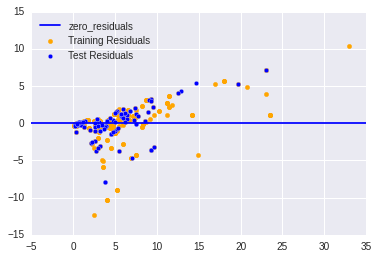

In [ ]:
train_res = y_train - y_train_predt
test_res = y_test - y_predt
plt.scatter(y_train, train_res, label = 'Training Residuals',color = 'orange')
plt.scatter(y_test, test_res, label = 'Test Residuals')
plt.axhline(0, label='zero_residuals')
plt.legend(loc='best')
plt.show()

In [ ]:
# Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df['MRP']
y = df['Current_Selling_Price']

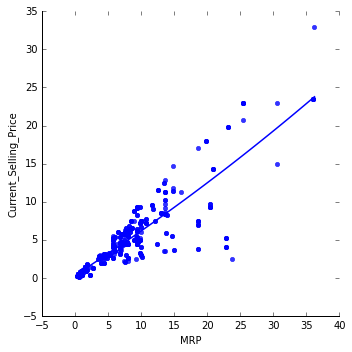

In [ ]:
sns.lmplot(x = 'MRP' , y = 'Current_Selling_Price', data = df, order = 2, ci = None)

In [ ]:
# Eliminating NaN or missing input numbers
df.fillna(method ='ffill', inplace = True)

In [ ]:

X = np.array(df['MRP']).reshape(-1, 1)
y = np.array(df['Current_Selling_Price']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.7248064038311455


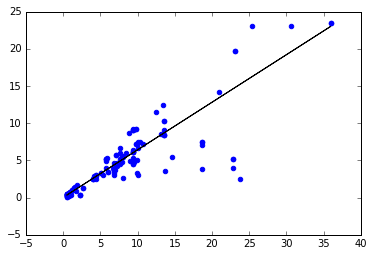

In [ ]:

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
# Data scatter of predicted values

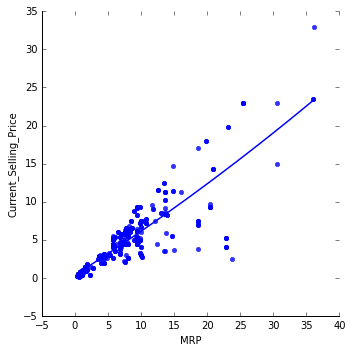

In [ ]:

df_binary500 = df[:][:500]
  
# Selecting the 1st 500 rows of the data
sns.lmplot(x ="MRP", y ="Current_Selling_Price", data = df_binary500,
                               order = 2, ci = None)

In [ ]:

df_binary500.fillna(method ='ffill', inplace = True)
  
X = np.array(df_binary500['MRP']).reshape(-1, 1)
y = np.array(df_binary500['Current_Selling_Price']).reshape(-1, 1)
  
df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.832283166988077


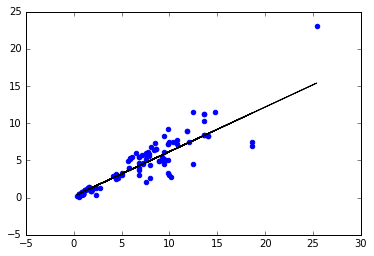

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()